<a href="https://colab.research.google.com/github/akulkarni14/AAI-praticals/blob/main/PR8_textual_explanations_for_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving lion-8096155_640.png to lion-8096155_640 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


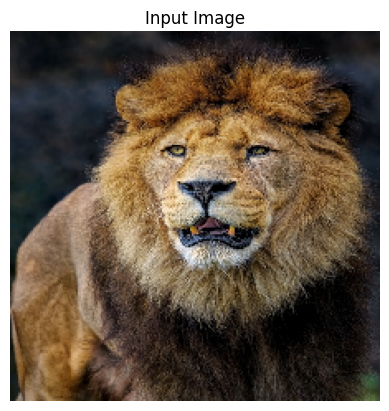


📝 Textual Explanation:
The model predicts this image as a **'Lion'** with a confidence of **100.0%**.

🔁 Other possible predictions include:
2. Chow (0.0%)
3. Cheetah (0.0%)


In [3]:
# 🧠 STEP 1: Install dependencies (if not already available)
!pip install tensorflow matplotlib

# 🧠 STEP 2: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files

# 🖼️ STEP 3: Upload image
uploaded = files.upload()  # Upload an image file like .jpg or .png
image_path = list(uploaded.keys())[0]

# 🧼 STEP 4: Preprocess image
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_expanded = np.expand_dims(img_array, axis=0)
img_preprocessed = imagenet_utils.preprocess_input(img_expanded)

# 🤖 STEP 5: Load the pre-trained model
model = VGG16(weights="imagenet")

# 🔮 STEP 6: Predict
predictions = model.predict(img_preprocessed)
decoded = imagenet_utils.decode_predictions(predictions, top=3)[0]

# 🖼️ STEP 7: Show the input image
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

# 📢 STEP 8: Generate Textual Explanation
top_pred = decoded[0]
label = top_pred[1].replace('_', ' ').title()
confidence = round(top_pred[2] * 100, 2)

print("\n📝 Textual Explanation:")
print(f"The model predicts this image as a **'{label}'** with a confidence of **{confidence}%**.")

# 📃 Optional: Show other top predictions
print("\n🔁 Other possible predictions include:")
for i, (id, name, prob) in enumerate(decoded[1:], start=2):
    print(f"{i}. {name.replace('_', ' ').title()} ({round(prob * 100, 2)}%)")
